In [ ]:
# that is a Churn data of a Bank

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

import keras
import keras.utils
from keras import utils as np_utils
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Deep_Learning/Techpro_education/ANN/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df = data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.drop(['customerID'], axis=1,inplace=True)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.6,Yes


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,1.000
tenure,7043.000,32.371,24.559,0.000,9.000,29.000,55.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,35.500,70.350,89.850,118.750


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(df[feature].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [ ]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [ ]:
df.MultipleLines.value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

#in this rows TotalCharges is blank I must drop this rows

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.550,,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.250,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.850,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.750,,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.050,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.850,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.350,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.000,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.700,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350,,No


In [ ]:
df = df[df.TotalCharges != ' ']

In [ ]:
df.shape

(7032, 20)

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

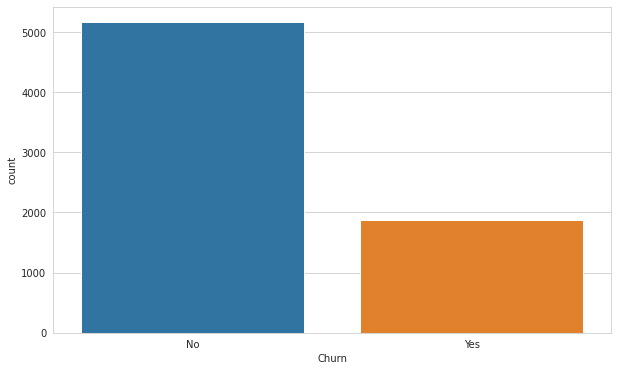

In [ ]:
sns.countplot(df.Churn)
plt.show() 

In [ ]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df.duplicated().sum()

22

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48aa261d50>,
      dtype=object)

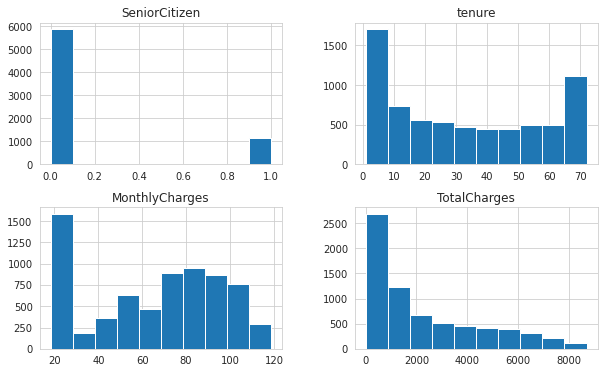

In [ ]:
df.hist()

In [ ]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
df.Churn.value_counts()

0    5153
1    1857
Name: Churn, dtype: int64

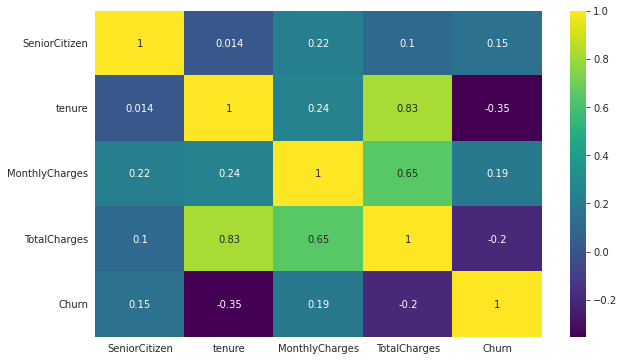

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='viridis');

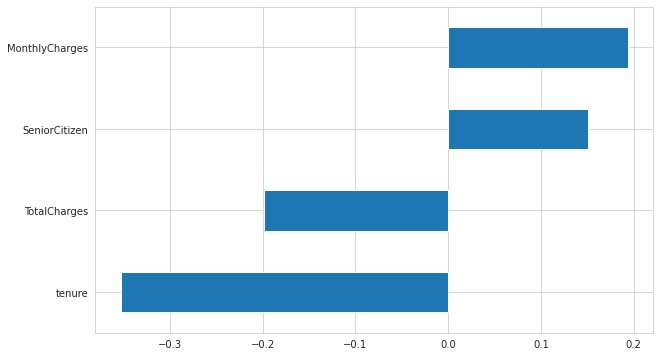

In [ ]:
df.corr()['Churn'][:-1].sort_values().plot.barh()

# The relationship between with target value an continous features

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.850,29.850,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,34,56.950,1889.500,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,0,2,53.850,108.150,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
3,0,45,42.300,1840.750,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0
4,0,2,70.700,151.650,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.800,1990.500,0,1,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1,0,0,1
7039,0,72,103.200,7362.900,0,0,1,1,1,1,1,0,0,1,1,0,1,1,1,0,1,1,0,0
7040,0,11,29.600,346.450,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.400,306.600,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
df.shape

(7010, 24)

In [ ]:
df.Churn.unique()

# in Churn Serie there is only 2 and 1 than unique

array([0, 1])

In [ ]:
df.dtypes

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_Yes                           uint8
DeviceProtection_Yes                       uint8
TechSupport_Yes                            uint8
StreamingTV_Yes                            uint8
StreamingMovies_Yes                        uint8
Contract_One year                          uint8
Contract_Two year                          uint8
PaperlessBilling_Yes

In [ ]:
X = df.drop('Churn',axis='columns')
y = df['Churn'].values

In [ ]:
seed = 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, stratify=y, random_state=seed)

In [ ]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(6309, 23)

In [ ]:
 tf.random.set_seed(42)

In [ ]:
model = Sequential()

model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer = 'adam',
              loss='binary_crossentropy',
              metrics = ['Recall'])

In [ ]:
#early_stop= EarlyStopping(monitor='val_loss',
                           #mode='auto',
                           #verbose=1,
                           #patience=50)

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6801423027166882, 1: 1.8877917414721723}

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1)
##callbacks=[early_stop]

Epoch 1/200
45/45 [==============================] - 1s 8ms/step - loss: 0.5740 - recall: 0.0114 - val_loss: 0.5380 - val_recall: 0.0056
Epoch 2/200
45/45 [==============================] - 0s 4ms/step - loss: 0.5018 - recall: 0.0509 - val_loss: 0.4793 - val_recall: 0.1854
Epoch 3/200
45/45 [==============================] - 0s 4ms/step - loss: 0.4590 - recall: 0.2760 - val_loss: 0.4470 - val_recall: 0.4326
Epoch 4/200
45/45 [==============================] - 0s 4ms/step - loss: 0.4383 - recall: 0.4307 - val_loss: 0.4332 - val_recall: 0.4888
Epoch 5/200
45/45 [==============================] - 0s 4ms/step - loss: 0.4297 - recall: 0.4936 - val_loss: 0.4271 - val_recall: 0.4944
Epoch 6/200
45/45 [==============================] - 0s 4ms/step - loss: 0.4246 - recall: 0.5171 - val_loss: 0.4279 - val_recall: 0.4438
Epoch 7/200
45/45 [==============================] - 0s 4ms/step - loss: 0.4218 - recall: 0.5218 - val_loss: 0.4231 - val_recall: 0.4831
Epoch 8/200
45/45 [======================

early 60---0.7845

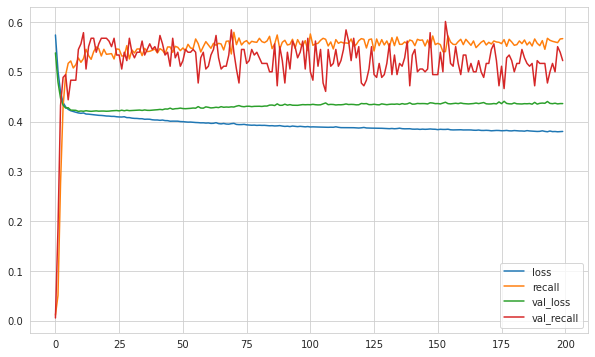

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = (model.predict(X_test)>0.25).astype('int32')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

22/22 [==============================] - 0s 2ms/step
[[388 127]
 [ 36 150]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       515
           1       0.54      0.81      0.65       186

    accuracy                           0.77       701
   macro avg       0.73      0.78      0.74       701
weighted avg       0.82      0.77      0.78       701



In [ ]:
#. 0.05 thresold-> 0.36      0.96      0.52       186
#. 0.2  thresold-> 0.48      0.80      0.60
#. 0.25 thresold-> 0.51      0.76      0.61       186
#. 0.3. thresold-> 0.56      0.71      0.62       186
#. 0.35-thresold-> 0.58      0.65      0.61       186
#. 0.4 -thresold-> 0.62      0.60      0.61       186


#0.55      0.78      0.65.    # 1 icin cikmis accur